In [ ]:
op_won_top=op_won.groupby('Opportunity_Type').agg({'Stage':'sum'}).nsmallest(5, 'Stage')
op_won_top

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
! wget https://raw.githubusercontent.com/micaelavillordo/Prueba/master/Entrenamieto_ECI_2020.csv

--2020-11-17 12:00:06--  https://raw.githubusercontent.com/micaelavillordo/Prueba/master/Entrenamieto_ECI_2020.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7622942 (7.3M) [text/plain]
Saving to: ‘Entrenamieto_ECI_2020.csv’

Entrenamieto_ECI_20 100%[===================>]   7.27M  27.1MB/s    in 0.3s    

2020-11-17 12:00:07 (27.1 MB/s) - ‘Entrenamieto_ECI_2020.csv’ saved [7622942/7622942]



In [3]:
entrenamiento = pd.read_csv('Entrenamieto_ECI_2020.csv')
entrenamiento

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.5300,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.00,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,3/21/2016,3/25/2016,2016 - 3,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245

In [4]:
lw = entrenamiento[(entrenamiento.Stage == 'Closed Won') | (entrenamiento.Stage == 'Closed Lost')]
lw

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.5300,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.00,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,3/21/2016,3/25/2016,2016 - 3,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245

In [5]:
op = lw.groupby('Opportunity_ID').agg({'Stage':'max', 'Opportunity_Type': 'max'})
op['Opportunity_Type'].unique()

array(['Opportunity_Type_1', 'Opportunity_Type_19', 'Opportunity_Type_7',
       'Opportunity_Type_8', 'Opportunity_Type_2', 'Opportunity_Type_4',
       'Opportunity_Type_11', 'Opportunity_Type_20',
       'Opportunity_Type_12', 'Opportunity_Type_3', 'Opportunity_Type_5',
       'Opportunity_Type_15', 'Opportunity_Type_0', 'Opportunity_Type_14',
       'Opportunity_Type_18', 'Opportunity_Type_23', 'Opportunity_Type_9',
       'Opportunity_Type_21', 'Opportunity_Type_22',
       'Opportunity_Type_10', 'Opportunity_Type_17',
       'Opportunity_Type_13', 'Opportunity_Type_6', 'Opportunity_Type_16',
       'Opportunity_Type_24'], dtype=object)

In [6]:
op_won = op[op.Stage == 'Closed Won']
op_won['Stage']=1
op_won

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Stage,Opportunity_Type
Opportunity_ID,,
1,1,Opportunity_Type_1
2,1,Opportunity_Type_1
7,1,Opportunity_Type_1
11,1,Opportunity_Type_19
20,1,Opportunity_Type_8
...,...,...
12794,1,Opportunity_Type_19
12796,1,Opportunity_Type_7
12797,1,Opportunity_Type_8


In [56]:
op_won_top=op_won.groupby('Opportunity_Type').agg({'Stage':'sum'}).nlargest(10, 'Stage')
op_won_top

,Stage
Opportunity_Type,
Opportunity_Type_1,2668
Opportunity_Type_7,1373
Opportunity_Type_8,516
Opportunity_Type_19,202
Opportunity_Type_12,122
Opportunity_Type_3,82
Opportunity_Type_20,30
Opportunity_Type_4,19
Opportunity_Type_2,17


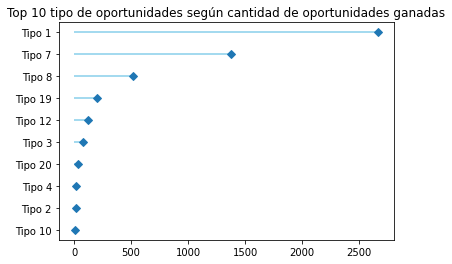

In [78]:
df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'values':np.random.uniform(size=20) })
 
# Reorder it following the values:
ordered_df = op_won_top.sort_values(by='Stage')
my_range=range(1,len(op_won_top.index)+1)
 
# Make the plot
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Stage'], color='skyblue')
plt.plot(ordered_df['Stage'], my_range, "D")
plt.yticks(my_range, labels=['Tipo 10','Tipo 2','Tipo 4','Tipo 20','Tipo 3','Tipo 12','Tipo 19','Tipo 8','Tipo 7','Tipo 1'])
plt.title("Top 10 tipo de oportunidades según cantidad de oportunidades ganadas")
plt.show()


In [8]:
op_lost=op[op.Stage == 'Closed Lost']
op_lost['Stage']=1
op_lost

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Stage,Opportunity_Type
Opportunity_ID,,
0,1,Opportunity_Type_1
3,1,Opportunity_Type_19
4,1,Opportunity_Type_19
5,1,Opportunity_Type_19
6,1,Opportunity_Type_19
...,...,...
12795,1,Opportunity_Type_1
12798,1,Opportunity_Type_19
12800,1,Opportunity_Type_19


In [67]:
op_lost_top=op_lost.groupby('Opportunity_Type').agg({'Stage':'sum'}).nlargest(10, 'Stage')
op_lost_top

,Stage
Opportunity_Type,
Opportunity_Type_1,2460
Opportunity_Type_19,1075
Opportunity_Type_7,622
Opportunity_Type_8,219
Opportunity_Type_20,105
Opportunity_Type_3,100
Opportunity_Type_2,36
Opportunity_Type_4,28
Opportunity_Type_12,16


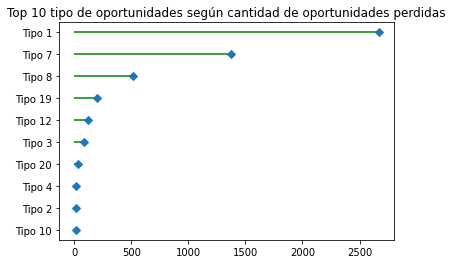

In [80]:
df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'values':np.random.uniform(size=20) })
 
# Reorder it following the values:
ordered_df = op_won_top.sort_values(by='Stage')
my_range=range(1,len(op_won_top.index)+1)
 
# Make the plot
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Stage'], color='green')
plt.plot(ordered_df['Stage'], my_range, "D")
plt.yticks(my_range, labels=['Tipo 10','Tipo 2','Tipo 4','Tipo 20','Tipo 3','Tipo 12','Tipo 19','Tipo 8','Tipo 7','Tipo 1'])
plt.title("Top 10 tipo de oportunidades según cantidad de oportunidades perdidas")
plt.show()